# Türkiye için Küresel Enerji Değerlendirmesi

## Bölüm 4 - G400 - 400 milyon nüfuslu bloklar - Yunuslar


Barış Sanlı, barissanli2@gmail.com

Enerji verileri için https://www.energyinst.org/statistical-review/resources-and-data-downloads (Narrow - CSV Format) indirin

In [1]:
#!pip install plotnine         # 1. should be sufficient for most
#!pip install 'plotnine[all]'

In [2]:
# font sorunları için
# rebuild font cache https://stackoverflow.com/questions/37920935/matplotlib-cant-find-font-installed-in-my-linux-machine/70647041#70647041
# font install https://techoverflow.net/2024/01/29/how-to-fix-matplotlib-findfont-font-family-xkcd-not-found-on-ubuntu-22-04/
# brew install font-xkbcd

In [3]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)
#warnings.filterwarnings(action='once')
from plotnine import ggplot, geom_point, aes, stat_smooth, facet_wrap
from plotnine.data import mtcars
from plotnine import *
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import pandas as pd


In [4]:
import pandas as pd

In [5]:
#%matplotlib inline

-------------deneme bölgesi--------------

In [6]:
df=pd.read_csv("merged_narrow.csv")
df.drop(columns=['Region', 'SubRegion',"OPEC","EU","OECD","CIS","ISO3166_alpha3","ISO3166_numeric"], inplace=True)

In [7]:
df.Country.unique()

array(['Brazil', 'Other North America', 'Other S. & Cent. America',
       'Other South America', 'Total Asia Pacific', 'Total CIS',
       'Total EU', 'Total Europe', 'Total Middle East', 'Total Non-OECD',
       'Total North America', 'Total OECD', 'Total S. & Cent. America',
       'Total World', 'US', 'Total Africa', 'Argentina', 'Australia',
       'Austria', 'Belarus', 'Belgium', 'Bulgaria', 'Canada', 'China',
       'China Hong Kong SAR', 'Colombia', 'Croatia', 'Cyprus',
       'Czech Republic', 'Denmark', 'Ecuador', 'Estonia', 'Finland',
       'France', 'Germany', 'Greece', 'Hungary', 'Iceland', 'India',
       'Indonesia', 'Ireland', 'Israel', 'Italy', 'Japan', 'Kazakhstan',
       'Latvia', 'Lithuania', 'Luxembourg', 'Malaysia', 'Mexico',
       'Netherlands', 'New Zealand', 'North Macedonia', 'Norway',
       'Other Africa', 'Other Caribbean', 'Other Europe', 'Peru',
       'Philippines', 'Poland', 'Portugal', 'Romania',
       'Russian Federation', 'Slovakia', 'Slovenia', 

In [8]:
ulkeler=["Turkiye","Total World","Total OECD","China","India","Total EU","US","Total Africa","Total CIS","Total Middle East"]
ortalar=["Vietnam","Thailand", "Indonesia", "Brazil", "Pakistan", "Philippines", "Bangladesh", "Iran", "Russian Federation"]

#400'ler
brmx=["Brazil","Mexico","Chile","Argentina","Colombia"]
usca=["US","Canada","United Kingdom"]
bapa=["Bangladesh","Pakistan","Sri Lanka"]
invith=["Vietnam","Thailand","Indonesia"]
egme=["Egypt","Total Middle East"]
med=["Spain","France","Italy","Greece","Israel","Egypt","Morocco","Algeria","Turkiye"]
eu=["Total EU"]
g400=brmx+usca+bapa+invith+egme+eu+med+["Turkiye","Total World","China"]
g400_basliklar=eu+["brmx","usca","bapa","invith","egme","med"]
ulkeler=ulkeler+ortalar
tumulkeler=ulkeler+["Orta","Dünya-Çin","Diğer"]
ilkyil=1975

In [9]:
df[df.Country.isin(["Eastern Africa"]) & df.Year.isin([2023]) & df.Var.isin(["pop"])]

,Country,Year,Var,Value


In [10]:
degiskenler=["pop", "GDP", "primary_ej","primary_eintensity","oilcons_ej", "gascons_ej","coalcons_ej","renewables_ej","co2_mtco2","elect_twh","ren_power_twh","solar_twh","wind_twh" ]

In [11]:
ds=df[df.Country.isin(g400) & (df.Year>ilkyil) & df.Var.isin(degiskenler)]

In [12]:
dt=ds.pivot_table(index="Year",columns=["Country","Var"],values="Value")

In [13]:
#dt[ortalar].groupby(level=1, axis=1).sum()

In [14]:
for i in g400:
      dt[i,"GDP"] = dt[i,"primary_ej"]/ dt[i,"primary_eintensity"]

In [15]:
for i in degiskenler:
  dt['brmx', i] = dt[brmx].groupby(level=1, axis=1).sum()[i]
for i in degiskenler:
  dt['usca', i] = dt[usca].groupby(level=1, axis=1).sum()[i]
for i in degiskenler:
  dt['bapa', i] = dt[bapa].groupby(level=1, axis=1).sum()[i]
for i in degiskenler:
  dt['invith', i] = dt[invith].groupby(level=1, axis=1).sum()[i]
for i in degiskenler:
  dt['egme', i] = dt[egme].groupby(level=1, axis=1).sum()[i]
for i in degiskenler:
  dt['med', i] = dt[med].groupby(level=1, axis=1).sum()[i]
#df = df.sort_index(axis=1)

In [16]:
for i in degiskenler:
  dt['Dünya-Çin', i] = dt["Total World",i]-dt["China",i]
#  dt['Diğer', i] = dt["Total World",i]-dt["China",i]-dt["India",i]-dt["Total Africa",i]-dt["Total OECD",i]-dt["Orta",i]
#df = df.sort_index(axis=1)
#df = df.sort_index(axis=1)

In [17]:
dt.tail(1).transpose()

Year                             2023
Country   Var                        
Algeria   co2_mtco2        248.548029
          coalcons_ej        0.006959
          elect_twh         85.909806
          gascons_ej         1.666665
          oilcons_ej         0.857524
...                               ...
Dünya-Çin co2_mtco2      27814.379380
          elect_twh      20468.312180
          ren_power_twh   3080.237163
          solar_twh       1057.426684
          wind_twh        1439.436225

[441 rows x 1 columns]

In [18]:
plt.rcdefaults()
plt.style.use('ggplot')
plt.style.use('seaborn-v0_8-whitegrid')

#plt.xkcd()

#plt.figure(figsize=(12,6))
matplotlib.rcParams['figure.figsize'] = (10, 6)
plt.xkcd()

# Nüfus

In [19]:
degiskenler

['pop',
 'GDP',
 'primary_ej',
 'primary_eintensity',
 'oilcons_ej',
 'gascons_ej',
 'coalcons_ej',
 'renewables_ej',
 'co2_mtco2',
 'elect_twh',
 'ren_power_twh',
 'solar_twh',
 'wind_twh']

In [20]:
t=0
a=0
for i in g400_basliklar:
  a=a+dt[(i,degiskenler[t])].values[-1]
dunya=dt[("Total World",degiskenler[t])].values[-1]
trkiye=dt[("Turkiye",degiskenler[t])].values[-1]
avg_g400=a/7
g400_dunya=100*a/dunya
avg_g400_dunya=100*(a/7)/dt[("Total World",degiskenler[t])].values[-1]
avg_tr_g400=100*dt[("Turkiye",degiskenler[t])].values[-1]/avg_g400
avg_tr=100*trkiye/avg_g400
print("Başlık:"+degiskenler[t])
print("Türkiye:"+ str(trkiye) )
print("Toplam G400:"+str(a) )
print("Dunya:"+str(dunya) )
print("Ortalama G400:"+ str(avg_g400) )
print("G400'ün küreseldeki oranı:"+ str(g400_dunya) )
print("Türkiye'nin ortalama G400 büyüklüğüne oranı: "+ str(avg_g400/trkiye) )

Başlık:pop
Türkiye:85.816199
Toplam G400:3109.901306
Dunya:8045.136093
Ortalama G400:444.2716151428572
G400'ün küreseldeki oranı:38.655670582203044
Türkiye'nin ortalama G400 büyüklüğüne oranı: 5.177013434757897


In [21]:
avg_tr

19.316156170005478

pop


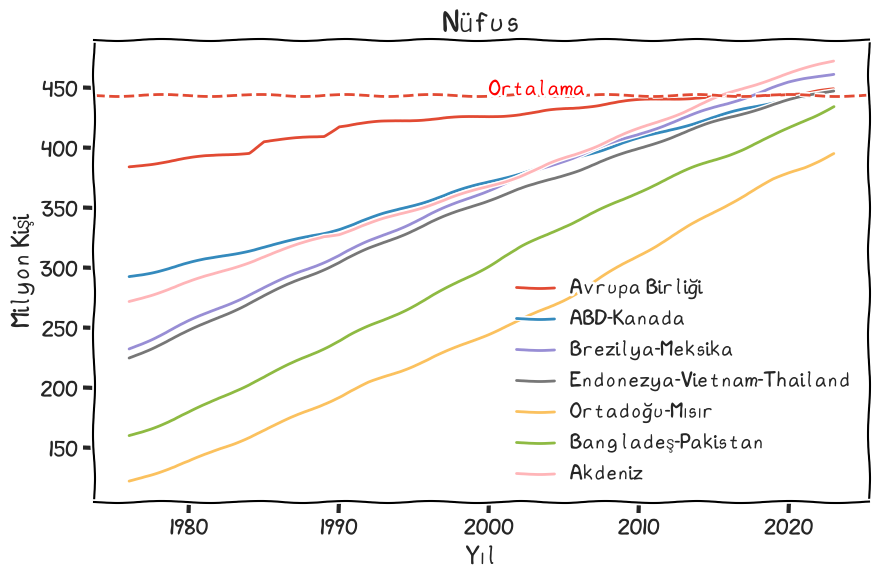

In [22]:
t=0
print(degiskenler[t])

w=dt[('Total World',degiskenler[t])]
tr=dt[('Turkiye',degiskenler[t])]

plt.plot(dt["Total EU",degiskenler[t]],label="Avrupa Birliği")
plt.plot(dt["usca",degiskenler[t]],label="ABD-Kanada")
plt.plot(dt["brmx",degiskenler[t]],label="Brezilya-Meksika")
plt.plot(dt["invith",degiskenler[t]],label="Endonezya-Vietnam-Thailand")
plt.plot(dt["egme",degiskenler[t]],label="Ortadoğu-Mısır")
plt.plot(dt["bapa",degiskenler[t]],label="Bangladeş-Pakistan")
plt.plot(dt["med",degiskenler[t]],label="Akdeniz")
plt.axhline(avg_g400, linestyle='--')
plt.annotate(xy=(2000,avg_g400),text="Ortalama",color="r")

#plt.plot(dt["Diğer",degiskenler[t]],label="Ortalt")
plt.title("Nüfus")
plt.xlabel("Yıl")
plt.ylabel("Milyon Kişi")
plt.legend()

pop


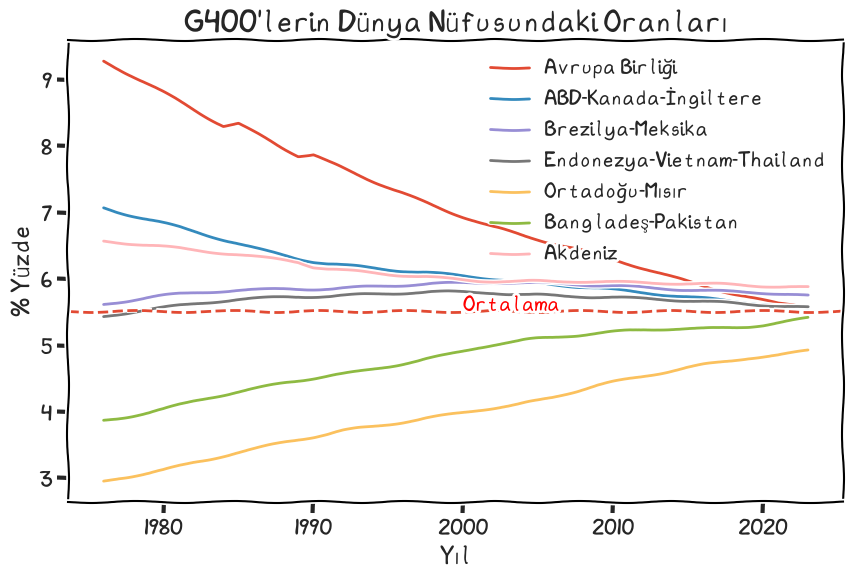

In [23]:
t=0
print(degiskenler[t])

w=dt[('Total World',degiskenler[t])]/100 #yüzde hesabı için
tr=dt[('Turkiye',degiskenler[t])]
plt.plot(dt["Total EU",degiskenler[t]]/w,label="Avrupa Birliği")
plt.plot(dt["usca",degiskenler[t]]/w,label="ABD-Kanada-İngiltere")
plt.plot(dt["brmx",degiskenler[t]]/w,label="Brezilya-Meksika")
plt.plot(dt["invith",degiskenler[t]]/w,label="Endonezya-Vietnam-Thailand")
plt.plot(dt["egme",degiskenler[t]]/w,label="Ortadoğu-Mısır")
plt.plot(dt["bapa",degiskenler[t]]/w,label="Bangladeş-Pakistan")
plt.plot(dt["med",degiskenler[t]]/w,label="Akdeniz")
plt.axhline(avg_g400_dunya, linestyle='--')
plt.annotate(xy=(2000,avg_g400_dunya),text="Ortalama",color="r")

#plt.plot(dt["Diğer",degiskenler[t]],label="Ortalt")
plt.title("G400'lerin Dünya Nüfusundaki Oranları")
plt.xlabel("Yıl")
plt.ylabel("% Yüzde")
plt.legend()

pop


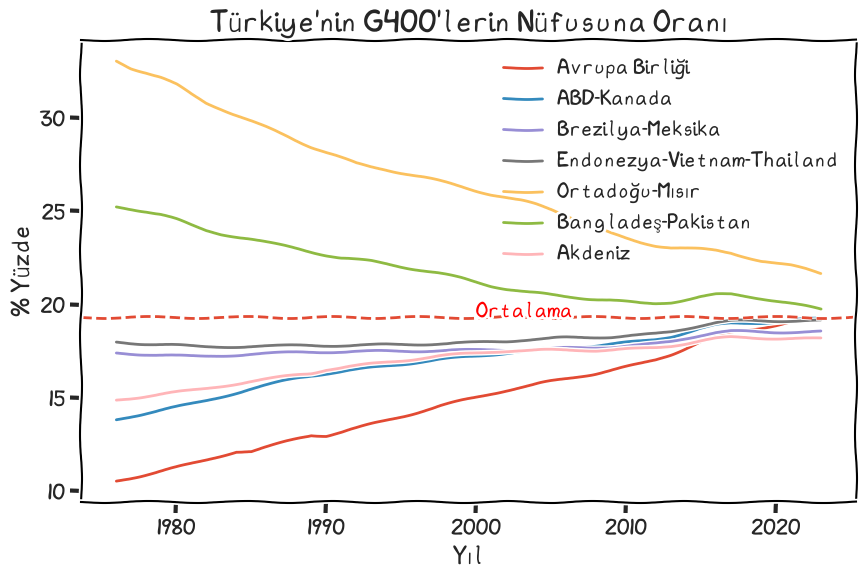

In [24]:
t=0
print(degiskenler[t])

w=dt[('Total World',degiskenler[t])] #yüzde hesabı için
tr=dt[('Turkiye',degiskenler[t])]*100

plt.plot(tr/dt["Total EU",degiskenler[t]],label="Avrupa Birliği")
plt.plot(tr/dt["usca",degiskenler[t]],label="ABD-Kanada")
plt.plot(tr/dt["brmx",degiskenler[t]],label="Brezilya-Meksika")
plt.plot(tr/dt["invith",degiskenler[t]],label="Endonezya-Vietnam-Thailand")
plt.plot(tr/dt["egme",degiskenler[t]],label="Ortadoğu-Mısır")
plt.plot(tr/dt["bapa",degiskenler[t]],label="Bangladeş-Pakistan")
plt.plot(tr/dt["med",degiskenler[t]],label="Akdeniz")
plt.axhline(avg_tr_g400, linestyle='--')
plt.annotate(xy=(2000,avg_tr_g400),text="Ortalama",color="r")

#plt.plot(dt["Diğer",degiskenler[t]],label="Ortalt")
plt.title("Türkiye'nin G400'lerin Nüfusuna Oranı")
plt.xlabel("Yıl")
plt.ylabel("% Yüzde")
plt.legend()

In [25]:
for i in g400_basliklar:
  print(i, (tr/dt[(i,degiskenler[t])]).values[-1])

Total EU 19.116051000835753
brmx 18.56020503589344
usca 19.219122520316283
bapa 19.712746195930738
invith 19.14709518505288
egme 21.674710002165448
med 18.156698367017214


# Ekonomi

In [26]:
t=1
a=0
for i in g400_basliklar:
  a=a+dt[(i,degiskenler[t])].values[-1]
dunya=dt[("Total World",degiskenler[t])].values[-1]
trkiye=dt[("Turkiye",degiskenler[t])].values[-1]
avg_g400=a/7
g400_dunya=100*a/dunya
avg_g400_dunya=100*(a/7)/dt[("Total World",degiskenler[t])].values[-1]
avg_tr_g400=100*dt[("Turkiye",degiskenler[t])].values[-1]/avg_g400
print("Başlık:"+degiskenler[t])
print("Türkiye:"+ str(trkiye) )
print("Toplam G400:"+str(a) )
print("Dunya:"+str(dunya) )
print("Ortalama G400:"+ str(avg_g400) )
print("G400'ün küreseldeki oranı:"+ str(g400_dunya) )
print("Türkiye'nin ortalama G400 büyüklüğüne oranı: "+ str(avg_tr_g400) )

Başlık:GDP
Türkiye:2.896803824018189
Toplam G400:82.41496213104703
Dunya:140.14201265988373
Ortalama G400:11.773566018721004
G400'ün küreseldeki oranı:58.80817648242516
Türkiye'nin ortalama G400 büyüklüğüne oranı: 24.60430271858175


In [27]:
dt=dt[-31:]

GDP


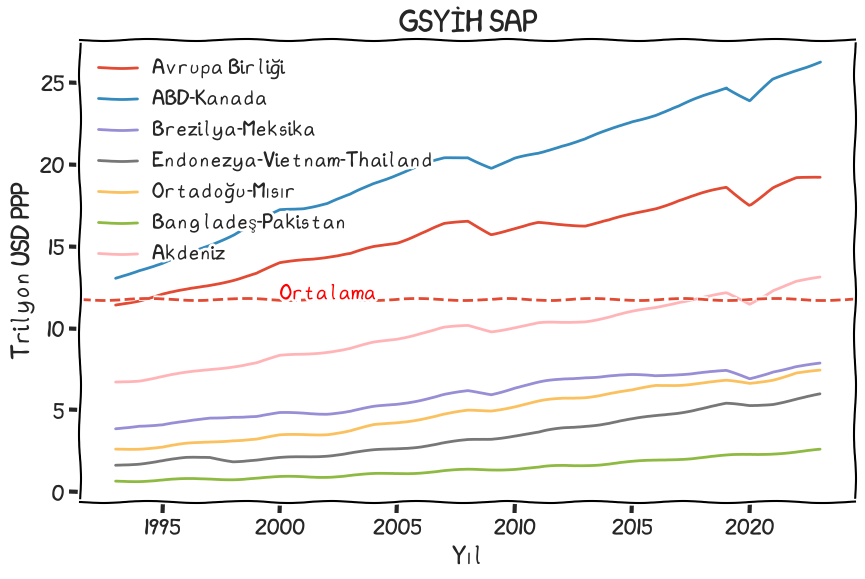

In [28]:
t=1
print(degiskenler[t])

w=dt[('Total World',degiskenler[t])]
tr=dt[('Turkiye',degiskenler[t])]

plt.plot(dt["Total EU",degiskenler[t]],label="Avrupa Birliği")
plt.plot(dt["usca",degiskenler[t]],label="ABD-Kanada")
plt.plot(dt["brmx",degiskenler[t]],label="Brezilya-Meksika")
plt.plot(dt["invith",degiskenler[t]],label="Endonezya-Vietnam-Thailand")
plt.plot(dt["egme",degiskenler[t]],label="Ortadoğu-Mısır")
plt.plot(dt["bapa",degiskenler[t]],label="Bangladeş-Pakistan")
plt.plot(dt["med",degiskenler[t]],label="Akdeniz")


plt.axhline(avg_g400, linestyle='--')
plt.annotate(xy=(2000,avg_g400),text="Ortalama",color="r")

#plt.xlim(1993,2024)

#plt.plot(dt["Diğer",degiskenler[t]],label="Ortalt")
plt.title("GSYİH SAP")
plt.xlabel("Yıl")
plt.ylabel("Trilyon USD PPP")
plt.legend()

GDP


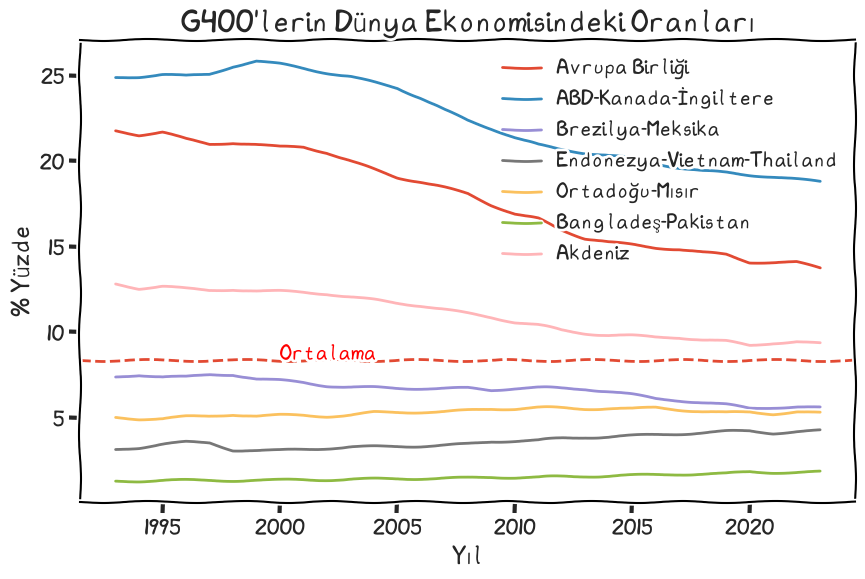

In [29]:
t=1
print(degiskenler[t])

w=dt[('Total World',degiskenler[t])]/100 #yüzde hesabı için
tr=dt[('Turkiye',degiskenler[t])]

plt.plot(dt["Total EU",degiskenler[t]]/w,label="Avrupa Birliği")
plt.plot(dt["usca",degiskenler[t]]/w,label="ABD-Kanada-İngiltere")
plt.plot(dt["brmx",degiskenler[t]]/w,label="Brezilya-Meksika")
plt.plot(dt["invith",degiskenler[t]]/w,label="Endonezya-Vietnam-Thailand")
plt.plot(dt["egme",degiskenler[t]]/w,label="Ortadoğu-Mısır")
plt.plot(dt["bapa",degiskenler[t]]/w,label="Bangladeş-Pakistan")
plt.plot(dt["med",degiskenler[t]]/w,label="Akdeniz")
plt.axhline(avg_g400_dunya, linestyle='--')
plt.annotate(xy=(2000,avg_g400_dunya),text="Ortalama",color="r")

#plt.plot(dt["Diğer",degiskenler[t]],label="Ortalt")
plt.title("G400'lerin Dünya Ekonomisindeki Oranları")
plt.xlabel("Yıl")
plt.ylabel("% Yüzde")
plt.legend()

GDP


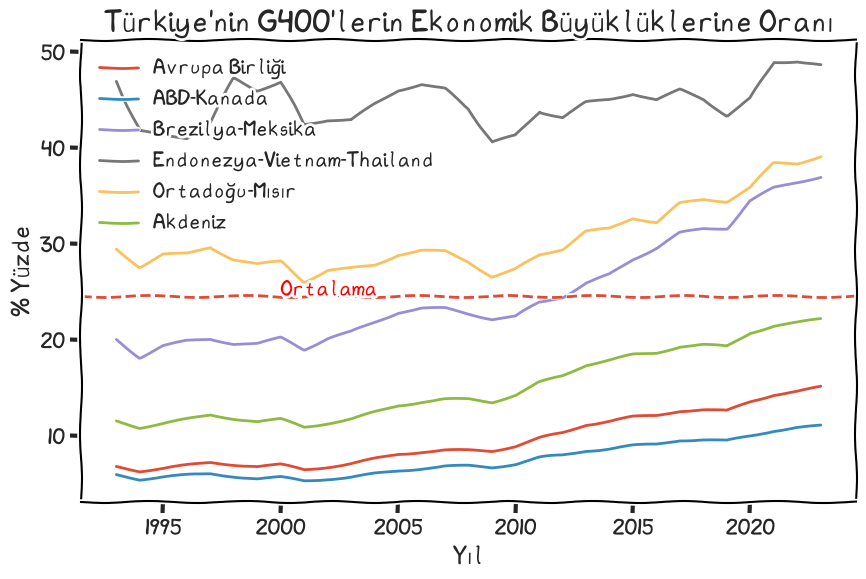

In [30]:
t=1
print(degiskenler[t])

w=dt[('Total World',degiskenler[t])] #yüzde hesabı için
tr=dt[('Turkiye',degiskenler[t])]*100

plt.plot(tr/dt["Total EU",degiskenler[t]],label="Avrupa Birliği")
plt.plot(tr/dt["usca",degiskenler[t]],label="ABD-Kanada")
plt.plot(tr/dt["brmx",degiskenler[t]],label="Brezilya-Meksika")
plt.plot(tr/dt["invith",degiskenler[t]],label="Endonezya-Vietnam-Thailand")
plt.plot(tr/dt["egme",degiskenler[t]],label="Ortadoğu-Mısır")
#plt.plot(tr/dt["bapa",degiskenler[t]],label="Bangladeş-Pakistan")
plt.plot(tr/dt["med",degiskenler[t]],label="Akdeniz")
plt.axhline(avg_tr_g400, linestyle='--')
plt.annotate(xy=(2000,avg_tr_g400),text="Ortalama",color="r")

#plt.plot(dt["Diğer",degiskenler[t]],label="Ortalt")
plt.title("Türkiye'nin G400'lerin Ekonomik Büyüklüklerine Oranı")
plt.xlabel("Yıl")
plt.ylabel("% Yüzde")
plt.legend()

In [31]:
for i in g400_basliklar:
  print(i, (tr/dt[(i,degiskenler[t])]).values[-1])

Total EU 15.053622210523633
brmx 36.987874796504975
usca 11.009123335372268
bapa 112.24676360962285
invith 48.61246572595861
egme 39.132279524263055
med 22.138538848528732


# Enerji

In [32]:
t=2
a=0
for i in g400_basliklar:
  a=a+dt[(i,degiskenler[t])].values[-1]
dunya=dt[("Total World",degiskenler[t])].values[-1]
trkiye=dt[("Turkiye",degiskenler[t])].values[-1]
avg_g400=a/7
g400_dunya=100*a/dunya
avg_g400_dunya=100*(a/7)/dt[("Total World",degiskenler[t])].values[-1]
avg_tr_g400=100*dt[("Turkiye",degiskenler[t])].values[-1]/avg_g400
print("Başlık:"+degiskenler[t])
print("Türkiye:"+ str(trkiye) )
print("Toplam G400:"+str(a) )
print("Dunya:"+str(dunya) )
print("Ortalama G400:"+ str(avg_g400) )
print("G400'ün küreseldeki oranı:"+ str(g400_dunya) )
print("G400-ortalama Dünya'ya  oranı: "+ str(avg_g400_dunya) )
print("Türkiye'nin ortalama G400 büyüklüğüne oranı: "+ str(avg_tr_g400) )

Başlık:primary_ej
Türkiye:7.003076595
Toplam G400:308.533746726
Dunya:619.6286568
Ortalama G400:44.076249532285715
G400'ün küreseldeki oranı:49.79333078611737
G400-ortalama Dünya'ya  oranı: 7.113332969445339
Türkiye'nin ortalama G400 büyüklüğüne oranı: 15.888549205780924


primary_ej


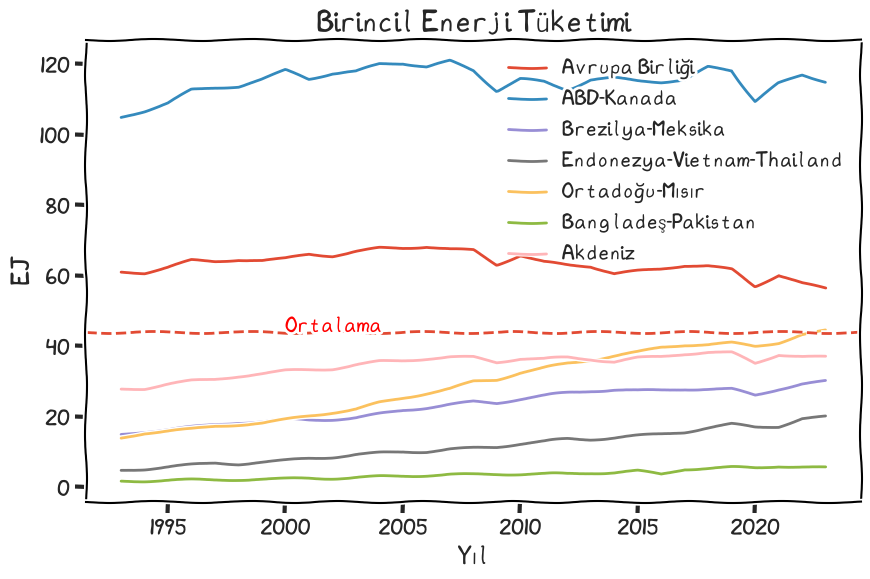

In [33]:
t=2
print(degiskenler[t])

w=dt[('Total World',degiskenler[t])]
tr=dt[('Turkiye',degiskenler[t])]

plt.plot(dt["Total EU",degiskenler[t]],label="Avrupa Birliği")
plt.plot(dt["usca",degiskenler[t]],label="ABD-Kanada")
plt.plot(dt["brmx",degiskenler[t]],label="Brezilya-Meksika")
plt.plot(dt["invith",degiskenler[t]],label="Endonezya-Vietnam-Thailand")
plt.plot(dt["egme",degiskenler[t]],label="Ortadoğu-Mısır")
plt.plot(dt["bapa",degiskenler[t]],label="Bangladeş-Pakistan")
plt.plot(dt["med",degiskenler[t]],label="Akdeniz")
plt.axhline(avg_g400, linestyle='--')
plt.annotate(xy=(2000,avg_g400),text="Ortalama",color="r")

#plt.plot(dt["Diğer",degiskenler[t]],label="Ortalt")
plt.title("Birincil Enerji Tüketimi")
plt.xlabel("Yıl")
plt.ylabel("EJ")
plt.legend()

primary_ej


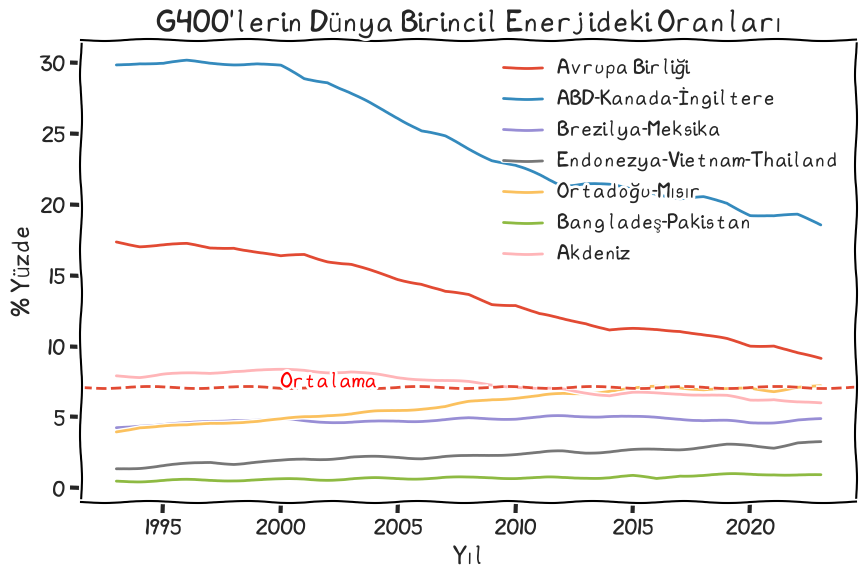

In [34]:
t=2
print(degiskenler[t])

w=dt[('Total World',degiskenler[t])]/100 #yüzde hesabı için
tr=dt[('Turkiye',degiskenler[t])]

plt.plot(dt["Total EU",degiskenler[t]]/w,label="Avrupa Birliği")
plt.plot(dt["usca",degiskenler[t]]/w,label="ABD-Kanada-İngiltere")
plt.plot(dt["brmx",degiskenler[t]]/w,label="Brezilya-Meksika")
plt.plot(dt["invith",degiskenler[t]]/w,label="Endonezya-Vietnam-Thailand")
plt.plot(dt["egme",degiskenler[t]]/w,label="Ortadoğu-Mısır")
plt.plot(dt["bapa",degiskenler[t]]/w,label="Bangladeş-Pakistan")
plt.plot(dt["med",degiskenler[t]]/w,label="Akdeniz")
plt.axhline(avg_g400_dunya, linestyle='--')
plt.annotate(xy=(2000,avg_g400_dunya),text="Ortalama",color="r")

#plt.plot(dt["Diğer",degiskenler[t]],label="Ortalt")
plt.title("G400'lerin Dünya Birincil Enerjideki Oranları")
plt.xlabel("Yıl")
plt.ylabel("% Yüzde")
plt.legend()

primary_ej


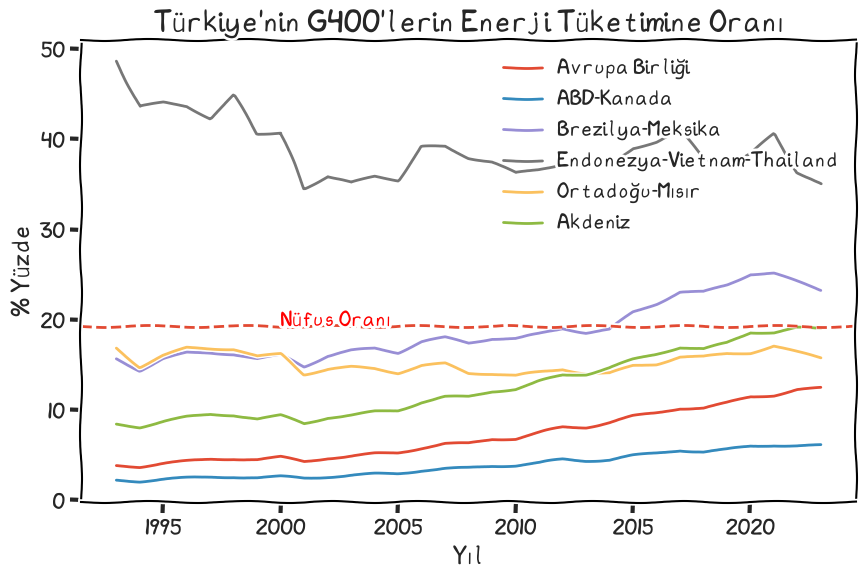

In [35]:
t=2
print(degiskenler[t])

w=dt[('Total World',degiskenler[t])] #yüzde hesabı için
tr=dt[('Turkiye',degiskenler[t])]*100

plt.plot(tr/dt["Total EU",degiskenler[t]],label="Avrupa Birliği")
plt.plot(tr/dt["usca",degiskenler[t]],label="ABD-Kanada")
plt.plot(tr/dt["brmx",degiskenler[t]],label="Brezilya-Meksika")
plt.plot(tr/dt["invith",degiskenler[t]],label="Endonezya-Vietnam-Thailand")
plt.plot(tr/dt["egme",degiskenler[t]],label="Ortadoğu-Mısır")
#plt.plot(tr/dt["bapa",degiskenler[t]],label="Bangladeş-Pakistan")
plt.plot(tr/dt["med",degiskenler[t]],label="Akdeniz")
plt.axhline(avg_tr, linestyle='--')
plt.annotate(xy=(2000,avg_tr),text="Nüfus Oranı",color="r")


#plt.plot(dt["Diğer",degiskenler[t]],label="Ortalt")
plt.title("Türkiye'nin G400'lerin Enerji Tüketimine Oranı")
plt.xlabel("Yıl")
plt.ylabel("% Yüzde")
plt.legend()

In [36]:
for i in g400_basliklar:
  print(i, (100*tr/dt[(i,degiskenler[t])]).values[-1])

Total EU 1242.0467876798493
brmx 2329.1269714622
usca 608.0070467295645
bapa 12595.010854122433
invith 3500.453217035492
egme 1577.3954186123997
med 1895.8334945121599


# Elektrik

In [37]:
degiskenler

['pop',
 'GDP',
 'primary_ej',
 'primary_eintensity',
 'oilcons_ej',
 'gascons_ej',
 'coalcons_ej',
 'renewables_ej',
 'co2_mtco2',
 'elect_twh',
 'ren_power_twh',
 'solar_twh',
 'wind_twh']

In [38]:
t=9
a=0
for i in g400_basliklar:
  a=a+dt[(i,degiskenler[t])].values[-1]
dunya=dt[("Total World",degiskenler[t])].values[-1]
trkiye=dt[("Turkiye",degiskenler[t])].values[-1]
avg_g400=a/7
g400_dunya=100*a/dunya
avg_g400_dunya=100*(a/7)/dt[("Total World",degiskenler[t])].values[-1]
avg_tr_g400=100*dt[("Turkiye",degiskenler[t])].values[-1]/avg_g400
print("Başlık:"+degiskenler[t])
print("Türkiye:"+ str(trkiye) )
print("Toplam G400:"+str(a) )
print("Dunya:"+str(dunya) )
print("Ortalama G400:"+ str(avg_g400) )
print("G400'ün küreseldeki oranı:"+ str(g400_dunya) )
print("Türkiye'nin ortalama G400 büyüklüğüne oranı: "+ str(avg_tr_g400) )

Başlık:elect_twh
Türkiye:328.0478222
Toplam G400:14168.290766279999
Dunya:29924.75218
Ortalama G400:2024.0415380399998
G400'ün küreseldeki oranı:47.34639298282737
Türkiye'nin ortalama G400 büyüklüğüne oranı: 16.20756373002445


elect_twh


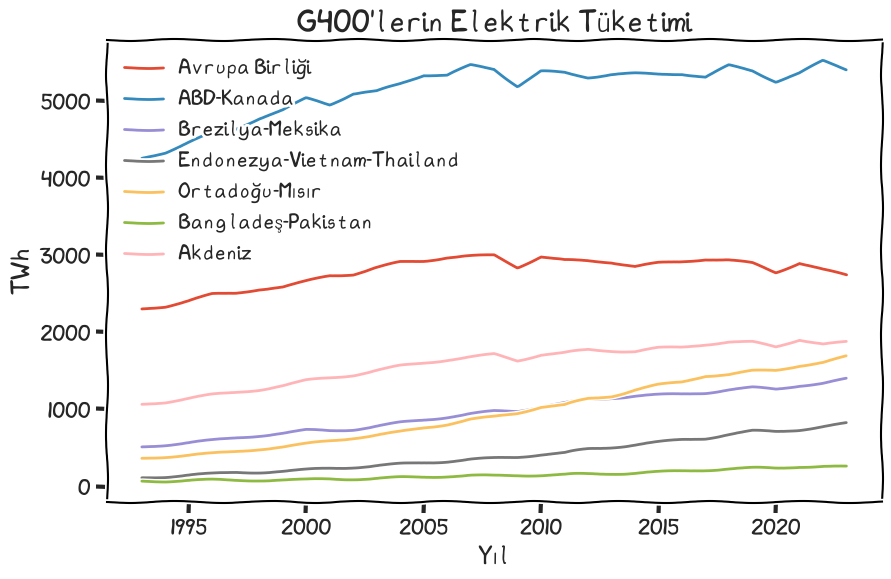

In [39]:
t=9
print(degiskenler[t])

w=dt[('Total World',degiskenler[t])]
tr=dt[('Turkiye',degiskenler[t])]

plt.plot(dt["Total EU",degiskenler[t]],label="Avrupa Birliği")
plt.plot(dt["usca",degiskenler[t]],label="ABD-Kanada")
plt.plot(dt["brmx",degiskenler[t]],label="Brezilya-Meksika")
plt.plot(dt["invith",degiskenler[t]],label="Endonezya-Vietnam-Thailand")
plt.plot(dt["egme",degiskenler[t]],label="Ortadoğu-Mısır")
plt.plot(dt["bapa",degiskenler[t]],label="Bangladeş-Pakistan")
plt.plot(dt["med",degiskenler[t]],label="Akdeniz")
#plt.axhline(avg_g400, linestyle='--')
#plt.annotate(xy=(2000,avg_g400),text="Ortalama",color="r")

#plt.plot(dt["Diğer",degiskenler[t]],label="Ortalt")
plt.title("G400'lerin Elektrik Tüketimi")
plt.xlabel("Yıl")
plt.ylabel("TWh")
plt.legend()

elect_twh


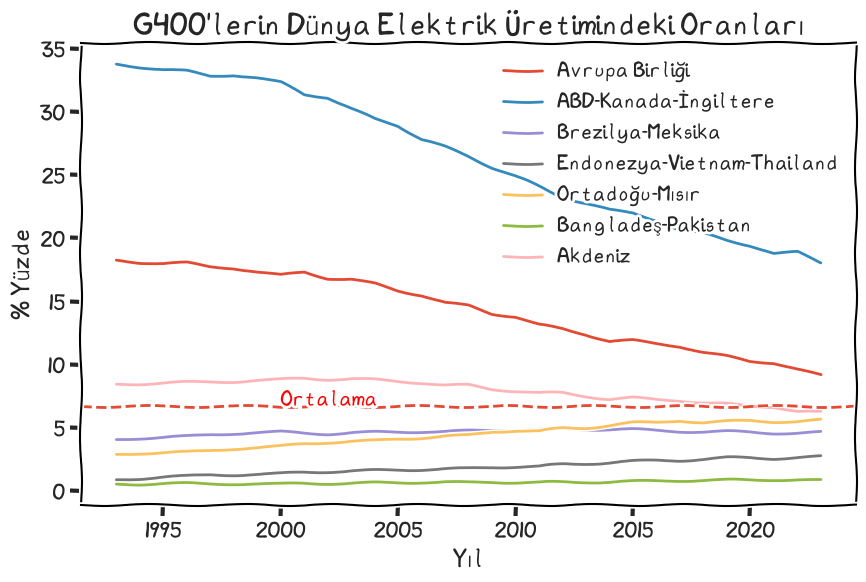

In [40]:
t=9
print(degiskenler[t])

w=dt[('Total World',degiskenler[t])]/100 #yüzde hesabı için
tr=dt[('Turkiye',degiskenler[t])]

plt.plot(dt["Total EU",degiskenler[t]]/w,label="Avrupa Birliği")
plt.plot(dt["usca",degiskenler[t]]/w,label="ABD-Kanada-İngiltere")
plt.plot(dt["brmx",degiskenler[t]]/w,label="Brezilya-Meksika")
plt.plot(dt["invith",degiskenler[t]]/w,label="Endonezya-Vietnam-Thailand")
plt.plot(dt["egme",degiskenler[t]]/w,label="Ortadoğu-Mısır")
plt.plot(dt["bapa",degiskenler[t]]/w,label="Bangladeş-Pakistan")
plt.plot(dt["med",degiskenler[t]]/w,label="Akdeniz")
plt.axhline(avg_g400_dunya, linestyle='--')
plt.annotate(xy=(2000,avg_g400_dunya),text="Ortalama",color="r")

#plt.plot(dt["Diğer",degiskenler[t]],label="Ortalt")
plt.title("G400'lerin Dünya Elektrik Üretimindeki Oranları")
plt.xlabel("Yıl")
plt.ylabel("% Yüzde")
plt.legend()

elect_twh


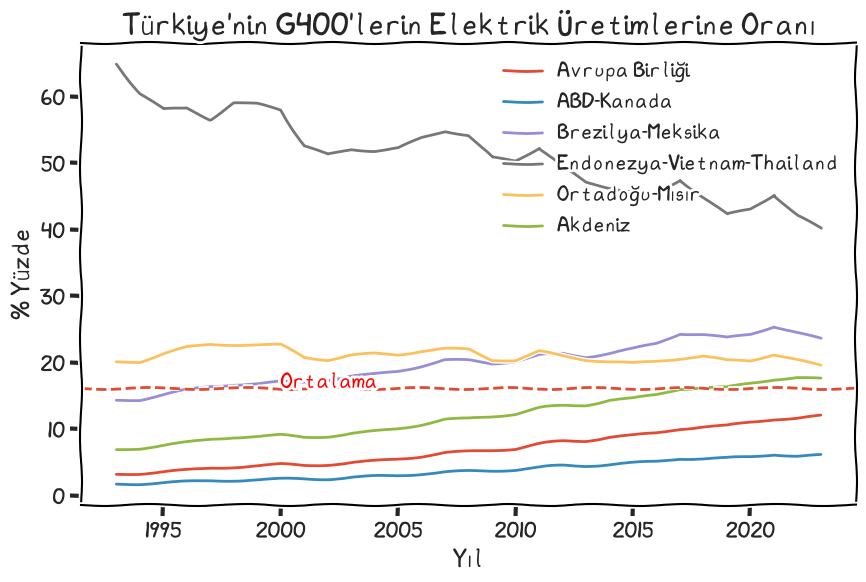

In [41]:
t=9
print(degiskenler[t])

w=dt[('Total World',degiskenler[t])] #yüzde hesabı için
tr=dt[('Turkiye',degiskenler[t])]*100

plt.plot(tr/dt["Total EU",degiskenler[t]],label="Avrupa Birliği")
plt.plot(tr/dt["usca",degiskenler[t]],label="ABD-Kanada")
plt.plot(tr/dt["brmx",degiskenler[t]],label="Brezilya-Meksika")
plt.plot(tr/dt["invith",degiskenler[t]],label="Endonezya-Vietnam-Thailand")
plt.plot(tr/dt["egme",degiskenler[t]],label="Ortadoğu-Mısır")
#plt.plot(tr/dt["bapa",degiskenler[t]],label="Bangladeş-Pakistan")
plt.plot(tr/dt["med",degiskenler[t]],label="Akdeniz")
plt.axhline(avg_tr_g400, linestyle='--')
plt.annotate(xy=(2000,avg_tr_g400),text="Ortalama",color="r")


#plt.plot(dt["Diğer",degiskenler[t]],label="Ortalt")
plt.title("Türkiye'nin G400'lerin Elektrik Üretimlerine Oranı")
plt.xlabel("Yıl")
plt.ylabel("% Yüzde")
plt.legend()

In [42]:
for i in g400_basliklar:
  print(i, (tr/dt[(i,degiskenler[t])]).values[-1])

Total EU 11.984599640827659
brmx 23.543488663802655
usca 6.060662670946515
bapa 129.39035970022755
invith 40.126377534811745
egme 19.48566058131078
med 17.539537749861186


In [43]:
degiskenler

['pop',
 'GDP',
 'primary_ej',
 'primary_eintensity',
 'oilcons_ej',
 'gascons_ej',
 'coalcons_ej',
 'renewables_ej',
 'co2_mtco2',
 'elect_twh',
 'ren_power_twh',
 'solar_twh',
 'wind_twh']

oilcons_ej


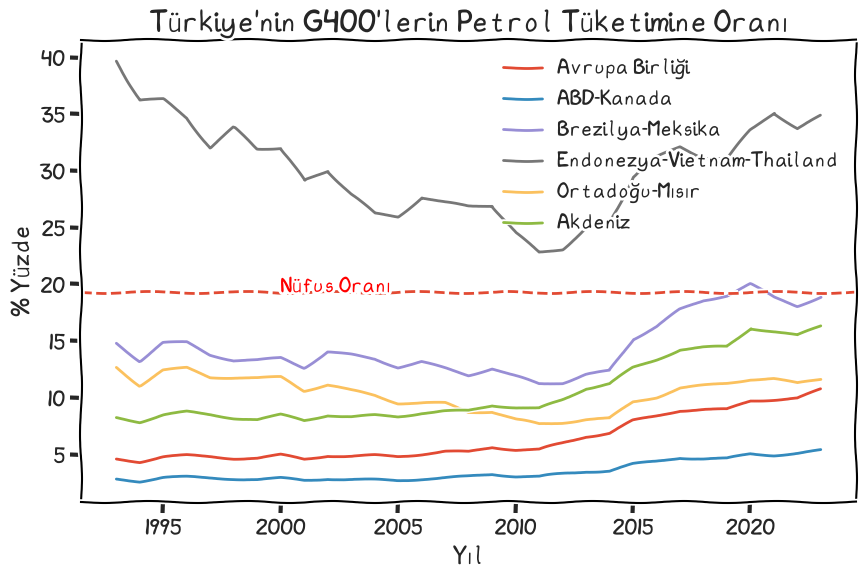

In [44]:
t=4
print(degiskenler[t])

w=dt[('Total World',degiskenler[t])] #yüzde hesabı için
tr=dt[('Turkiye',degiskenler[t])]*100

plt.plot(tr/dt["Total EU",degiskenler[t]],label="Avrupa Birliği")
plt.plot(tr/dt["usca",degiskenler[t]],label="ABD-Kanada")
plt.plot(tr/dt["brmx",degiskenler[t]],label="Brezilya-Meksika")
plt.plot(tr/dt["invith",degiskenler[t]],label="Endonezya-Vietnam-Thailand")
plt.plot(tr/dt["egme",degiskenler[t]],label="Ortadoğu-Mısır")
#plt.plot(tr/dt["bapa",degiskenler[t]],label="Bangladeş-Pakistan")
plt.plot(tr/dt["med",degiskenler[t]],label="Akdeniz")
plt.axhline(avg_tr, linestyle='--')
plt.annotate(xy=(2000,avg_tr),text="Nüfus Oranı",color="r")


#plt.plot(dt["Diğer",degiskenler[t]],label="Ortalt")
plt.title("Türkiye'nin G400'lerin Petrol Tüketimine Oranı")
plt.xlabel("Yıl")
plt.ylabel("% Yüzde")
plt.legend()

gascons_ej


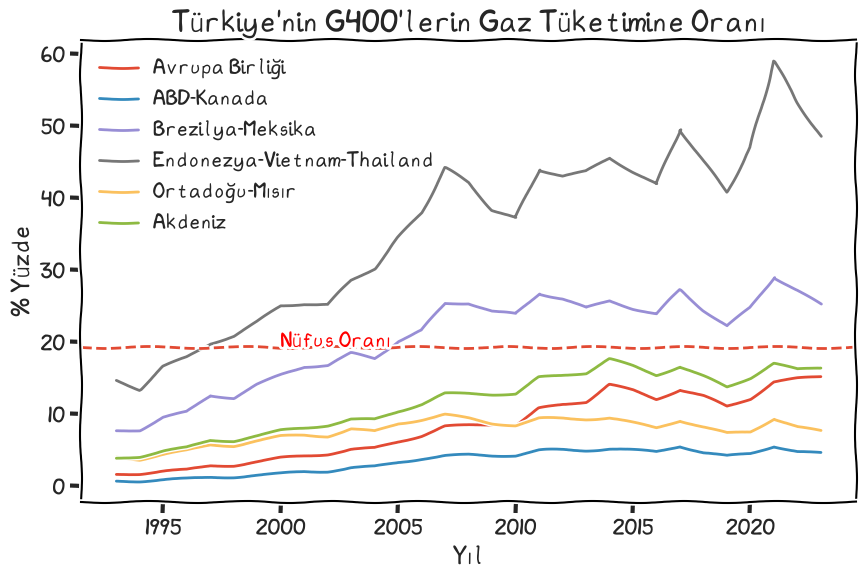

In [45]:
t=5
print(degiskenler[t])

w=dt[('Total World',degiskenler[t])] #yüzde hesabı için
tr=dt[('Turkiye',degiskenler[t])]*100

plt.plot(tr/dt["Total EU",degiskenler[t]],label="Avrupa Birliği")
plt.plot(tr/dt["usca",degiskenler[t]],label="ABD-Kanada")
plt.plot(tr/dt["brmx",degiskenler[t]],label="Brezilya-Meksika")
plt.plot(tr/dt["invith",degiskenler[t]],label="Endonezya-Vietnam-Thailand")
plt.plot(tr/dt["egme",degiskenler[t]],label="Ortadoğu-Mısır")
#plt.plot(tr/dt["bapa",degiskenler[t]],label="Bangladeş-Pakistan")
plt.plot(tr/dt["med",degiskenler[t]],label="Akdeniz")
plt.axhline(avg_tr, linestyle='--')
plt.annotate(xy=(2000,avg_tr),text="Nüfus Oranı",color="r")


#plt.plot(dt["Diğer",degiskenler[t]],label="Ortalt")
plt.title("Türkiye'nin G400'lerin Gaz Tüketimine Oranı")
plt.xlabel("Yıl")
plt.ylabel("% Yüzde")
plt.legend()

coalcons_ej


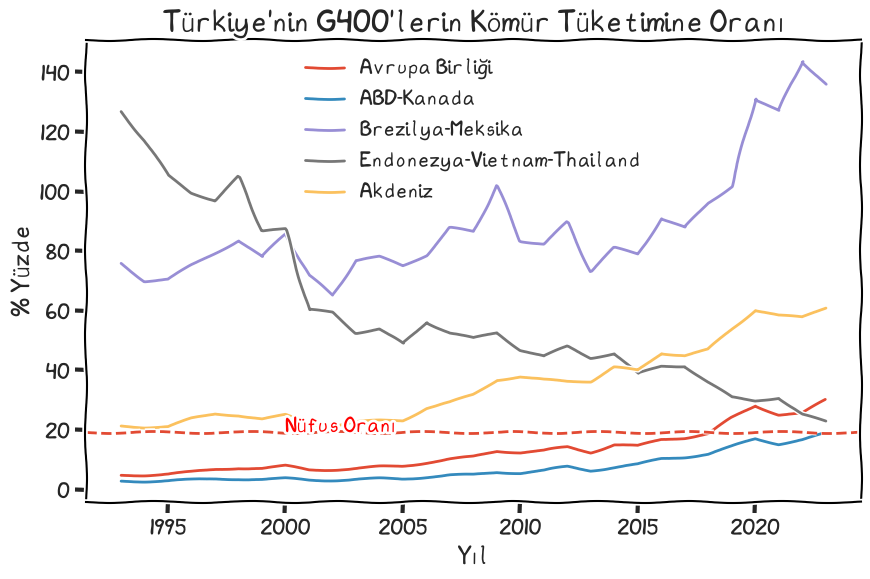

In [46]:
t=6
print(degiskenler[t])

w=dt[('Total World',degiskenler[t])] #yüzde hesabı için
tr=dt[('Turkiye',degiskenler[t])]*100

plt.plot(tr/dt["Total EU",degiskenler[t]],label="Avrupa Birliği")
plt.plot(tr/dt["usca",degiskenler[t]],label="ABD-Kanada")
plt.plot(tr/dt["brmx",degiskenler[t]],label="Brezilya-Meksika")
plt.plot(tr/dt["invith",degiskenler[t]],label="Endonezya-Vietnam-Thailand")
#plt.plot(tr/dt["egme",degiskenler[t]],label="Ortadoğu-Mısır")
#plt.plot(tr/dt["bapa",degiskenler[t]],label="Bangladeş-Pakistan")
plt.plot(tr/dt["med",degiskenler[t]],label="Akdeniz")
plt.axhline(avg_tr, linestyle='--')
plt.annotate(xy=(2000,avg_tr),text="Nüfus Oranı",color="r")


#plt.plot(dt["Diğer",degiskenler[t]],label="Ortalt")
plt.title("Türkiye'nin G400'lerin Kömür Tüketimine Oranı")
plt.xlabel("Yıl")
plt.ylabel("% Yüzde")
plt.legend()

ren_power_twh


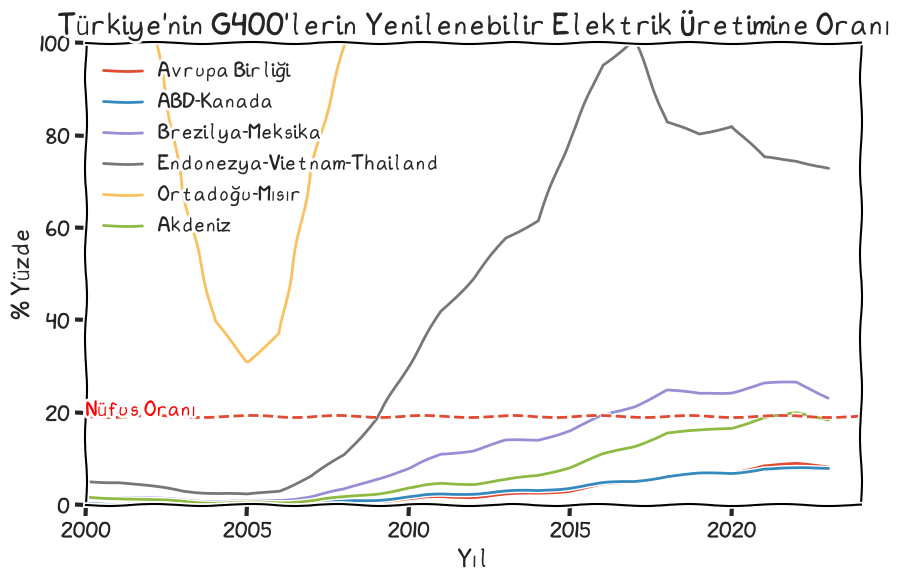

In [47]:
t=10
print(degiskenler[t])

w=dt[('Total World',degiskenler[t])] #yüzde hesabı için
tr=dt[('Turkiye',degiskenler[t])]*100

plt.plot(tr/dt["Total EU",degiskenler[t]],label="Avrupa Birliği")
plt.plot(tr/dt["usca",degiskenler[t]],label="ABD-Kanada")
plt.plot(tr/dt["brmx",degiskenler[t]],label="Brezilya-Meksika")
plt.plot(tr/dt["invith",degiskenler[t]],label="Endonezya-Vietnam-Thailand")
plt.plot(tr/dt["egme",degiskenler[t]],label="Ortadoğu-Mısır")
#plt.plot(tr/dt["bapa",degiskenler[t]],label="Bangladeş-Pakistan")
plt.plot(tr/dt["med",degiskenler[t]],label="Akdeniz")
plt.axhline(avg_tr, linestyle='--')
plt.annotate(xy=(2000,avg_tr),text="Nüfus Oranı",color="r")
plt.xlim(2000,2024)
plt.ylim(0,100)

#plt.plot(dt["Diğer",degiskenler[t]],label="Ortalt")
plt.title("Türkiye'nin G400'lerin Yenilenebilir Elektrik Üretimine Oranı")
plt.xlabel("Yıl")
plt.ylabel("% Yüzde")
plt.legend()

solar_twh


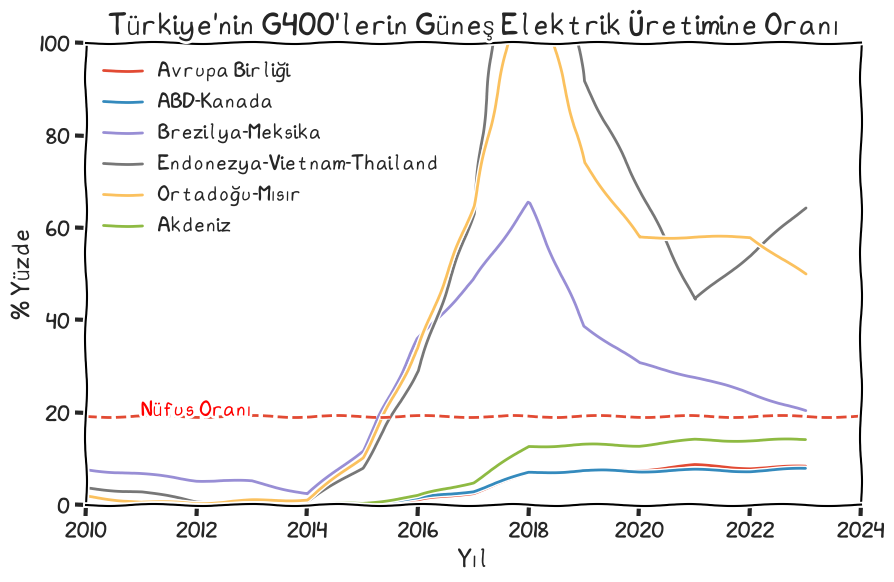

In [48]:
t=11
print(degiskenler[t])

w=dt[('Total World',degiskenler[t])] #yüzde hesabı için
tr=dt[('Turkiye',degiskenler[t])]*100

plt.plot(tr/dt["Total EU",degiskenler[t]],label="Avrupa Birliği")
plt.plot(tr/dt["usca",degiskenler[t]],label="ABD-Kanada")
plt.plot(tr/dt["brmx",degiskenler[t]],label="Brezilya-Meksika")
plt.plot(tr/dt["invith",degiskenler[t]],label="Endonezya-Vietnam-Thailand")
plt.plot(tr/dt["egme",degiskenler[t]],label="Ortadoğu-Mısır")
#plt.plot(tr/dt["bapa",degiskenler[t]],label="Bangladeş-Pakistan")
plt.plot(tr/dt["med",degiskenler[t]],label="Akdeniz")
plt.axhline(avg_tr, linestyle='--')
plt.annotate(xy=(2011,avg_tr),text="Nüfus Oranı",color="r")
plt.xlim(2010,2024)
plt.ylim(0,100)

#plt.plot(dt["Diğer",degiskenler[t]],label="Ortalt")
plt.title("Türkiye'nin G400'lerin Güneş Elektrik Üretimine Oranı")
plt.xlabel("Yıl")
plt.ylabel("% Yüzde")
plt.legend()

In [49]:
degiskenler

['pop',
 'GDP',
 'primary_ej',
 'primary_eintensity',
 'oilcons_ej',
 'gascons_ej',
 'coalcons_ej',
 'renewables_ej',
 'co2_mtco2',
 'elect_twh',
 'ren_power_twh',
 'solar_twh',
 'wind_twh']

co2_mtco2


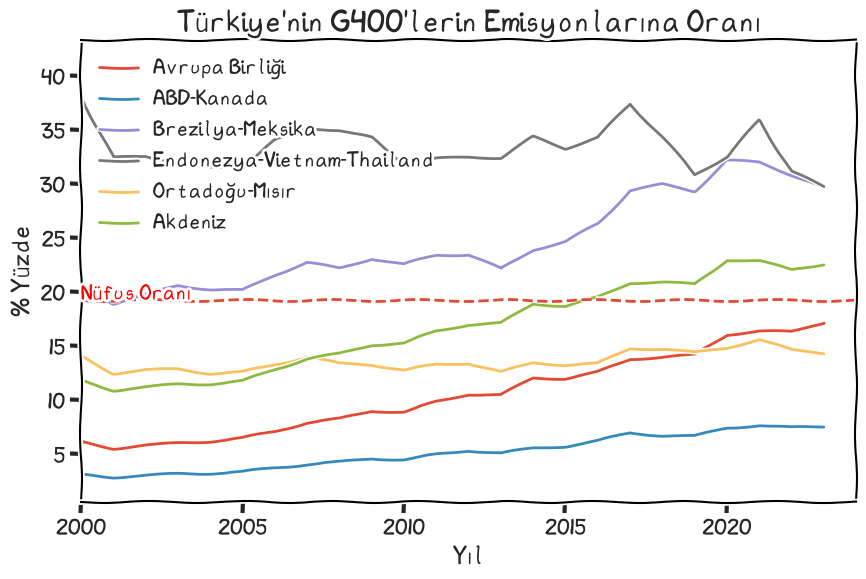

In [50]:
t=8
print(degiskenler[t])

w=dt[('Total World',degiskenler[t])] #yüzde hesabı için
tr=dt[('Turkiye',degiskenler[t])]*100

plt.plot(tr/dt["Total EU",degiskenler[t]],label="Avrupa Birliği")
plt.plot(tr/dt["usca",degiskenler[t]],label="ABD-Kanada")
plt.plot(tr/dt["brmx",degiskenler[t]],label="Brezilya-Meksika")
plt.plot(tr/dt["invith",degiskenler[t]],label="Endonezya-Vietnam-Thailand")
plt.plot(tr/dt["egme",degiskenler[t]],label="Ortadoğu-Mısır")
#plt.plot(tr/dt["bapa",degiskenler[t]],label="Bangladeş-Pakistan")
plt.plot(tr/dt["med",degiskenler[t]],label="Akdeniz")
plt.axhline(avg_tr, linestyle='--')
plt.annotate(xy=(2000,avg_tr),text="Nüfus Oranı",color="r")
plt.xlim(2000,2024)
#plt.ylim(0,100)

#plt.plot(dt["Diğer",degiskenler[t]],label="Ortalt")
plt.title("Türkiye'nin G400'lerin Emisyonlarına Oranı")
plt.xlabel("Yıl")
plt.ylabel("% Yüzde")
plt.legend()

In [51]:
85.8/444

0.19324324324324324

-------------asıl kod------------------------